In [28]:
from google.colab import files
uploaded = files.upload()
import pandas as pd



Saving dirty_cafe_sales.csv to dirty_cafe_sales (2).csv


In [29]:
import pandas as pd

df = pd.read_csv("dirty_cafe_sales.csv")
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [35]:
import pandas as pd
import numpy as np
from google.colab import files

df = pd.read_csv("dirty_cafe_sales.csv")


df.replace(["ERROR", "UNKNOWN"], np.nan, inplace=True)


df["Quantity"] = pd.to_numeric(df["Quantity"], errors='coerce')
df["Price Per Unit"] = pd.to_numeric(df["Price Per Unit"], errors='coerce')
df["Total Spent"] = pd.to_numeric(df["Total Spent"], errors='coerce')

df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors='coerce')

df["Quantity"] = df["Quantity"].fillna(df["Quantity"].median())
df["Price Per Unit"] = df["Price Per Unit"].fillna(df["Price Per Unit"].median())
df["Total Spent"] = df["Total Spent"].fillna(df["Quantity"] * df["Price Per Unit"])
df["Payment Method"] = df["Payment Method"].fillna(df["Payment Method"].mode()[0])
df["Location"] = df["Location"].fillna(df["Location"].mode()[0])
df["Item"] = df["Item"].fillna(df["Item"].mode()[0])
df["Transaction Date"] = df["Transaction Date"].fillna(df["Transaction Date"].mode()[0])

print("Missing values after cleaning:\n", df.isnull().sum())

df.to_csv("cleaned_cafe_sales.csv", index=False)
files.download("cleaned_cafe_sales.csv")




Missing values after cleaning:
 Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

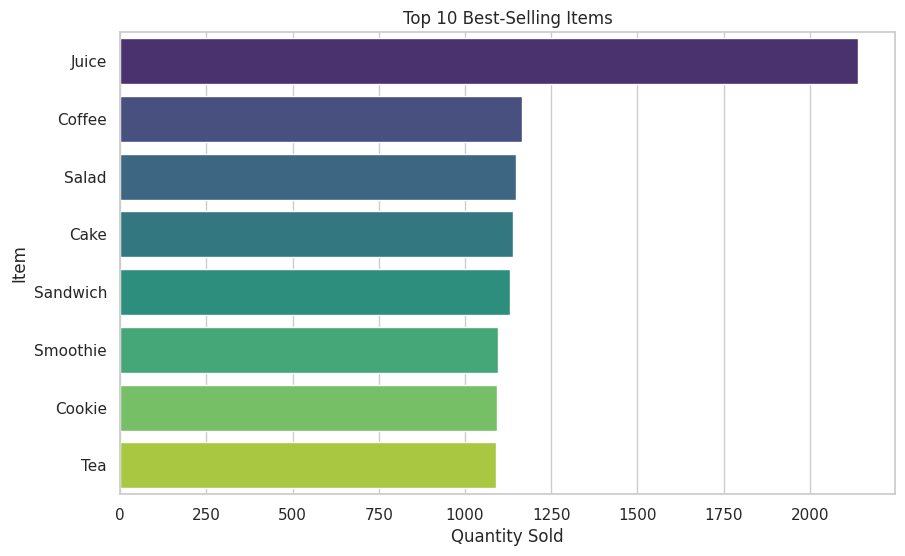

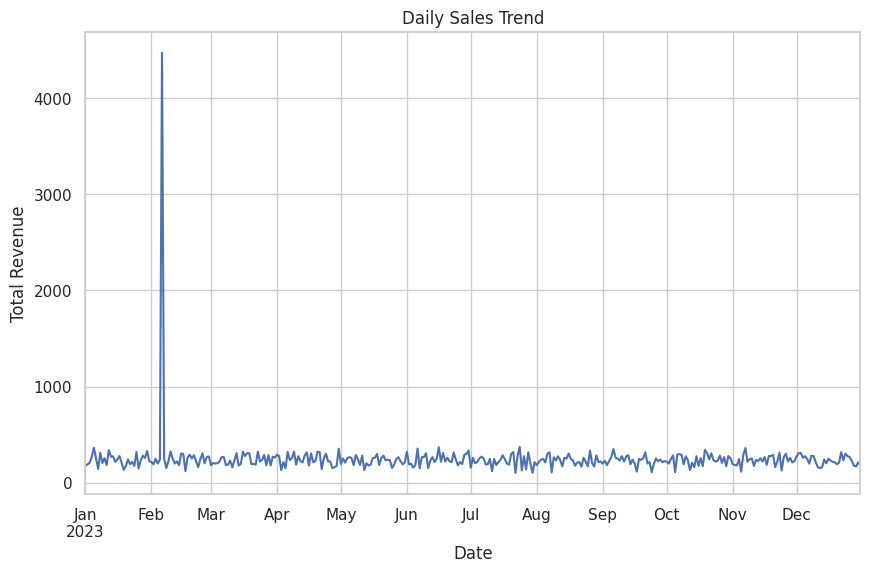

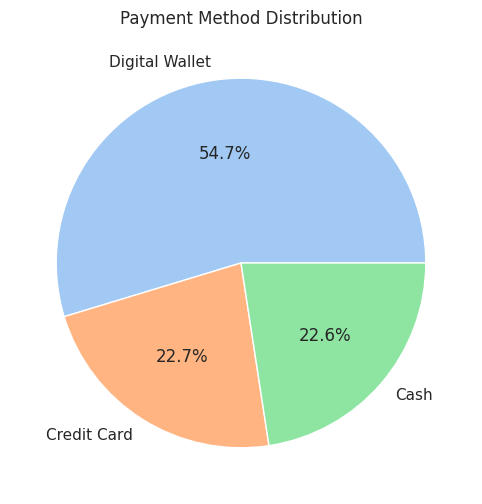

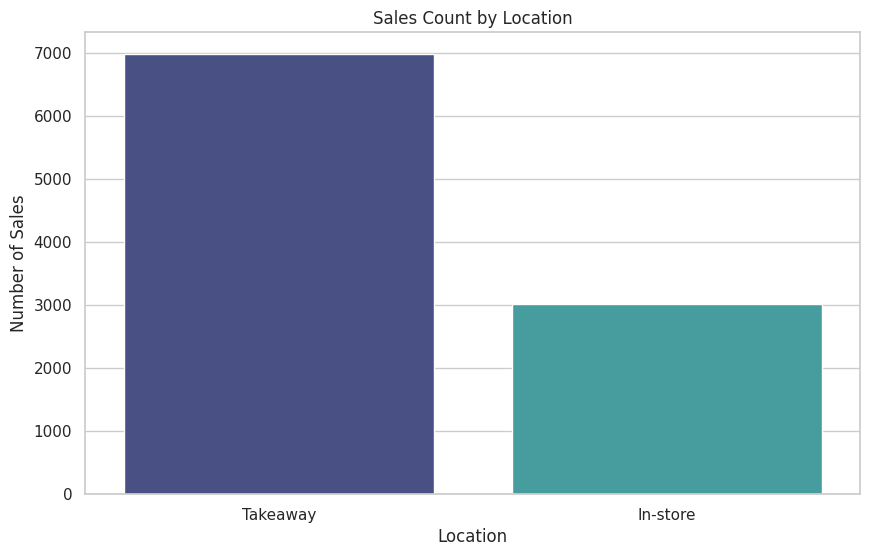

Total Revenue: $ 89307.5
Most Popular Item: Juice
Most Used Payment Method: Digital Wallet


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

top_items = df["Item"].value_counts().head(10).reset_index()
top_items.columns = ["Item", "Count"]
sns.barplot(data=top_items, x="Count", y="Item", palette="viridis", hue="Item", legend=False)
plt.title("Top 10 Best-Selling Items")
plt.xlabel("Quantity Sold")
plt.ylabel("Item")
plt.show()

daily_sales = df.groupby("Transaction Date")["Total Spent"].sum()
daily_sales.plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.show()

df["Payment Method"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()

location_sales = df["Location"].value_counts().reset_index()
location_sales.columns = ["Location", "Count"]
sns.barplot(data=location_sales, x="Location", y="Count", palette="mako", hue="Location", legend=False)
plt.title("Sales Count by Location")
plt.xlabel("Location")
plt.ylabel("Number of Sales")
plt.show()

print("Total Revenue: $", round(df["Total Spent"].sum(), 2))
print("Most Popular Item:", df["Item"].mode()[0])
print("Most Used Payment Method:", df["Payment Method"].mode()[0])



In [32]:
df.describe()





,Quantity,Price Per Unit,Total Spent,Transaction Date
count,10000.000000,10000.00000,10000.000000,10000
mean,3.027100,2.95265,8.930750,2023-06-25 05:52:13.440000
min,1.000000,1.00000,1.000000,2023-01-01 00:00:00
25%,2.000000,2.00000,4.000000,2023-03-19 00:00:00
50%,3.000000,3.00000,8.000000,2023-06-24 00:00:00
75%,4.000000,4.00000,12.000000,2023-09-27 00:00:00
max,5.000000,5.00000,25.000000,2023-12-31 00:00:00
std,1.384614,1.24396,5.997122,NaN


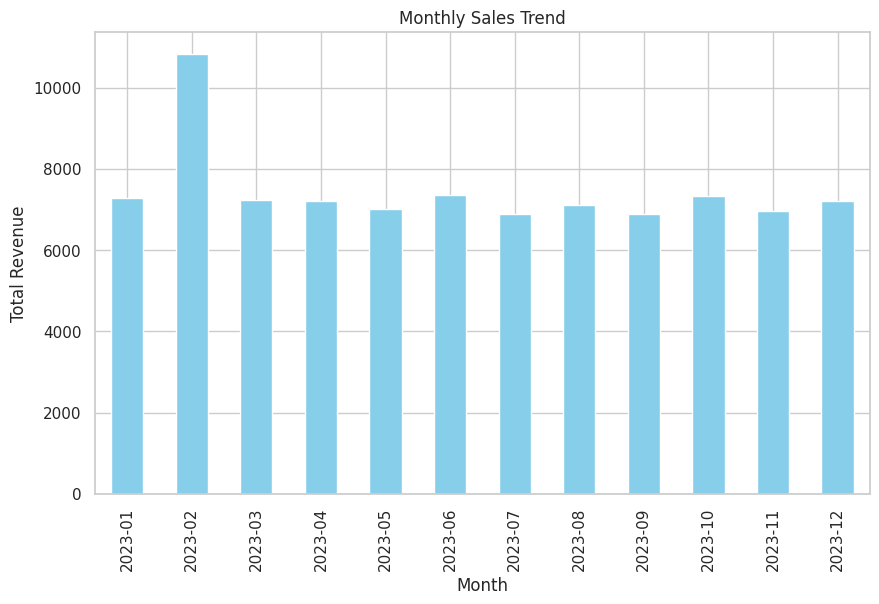

In [33]:
monthly_sales = df.groupby(df["Transaction Date"].dt.to_period("M"))["Total Spent"].sum()
monthly_sales.plot(kind="bar", color="skyblue")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()


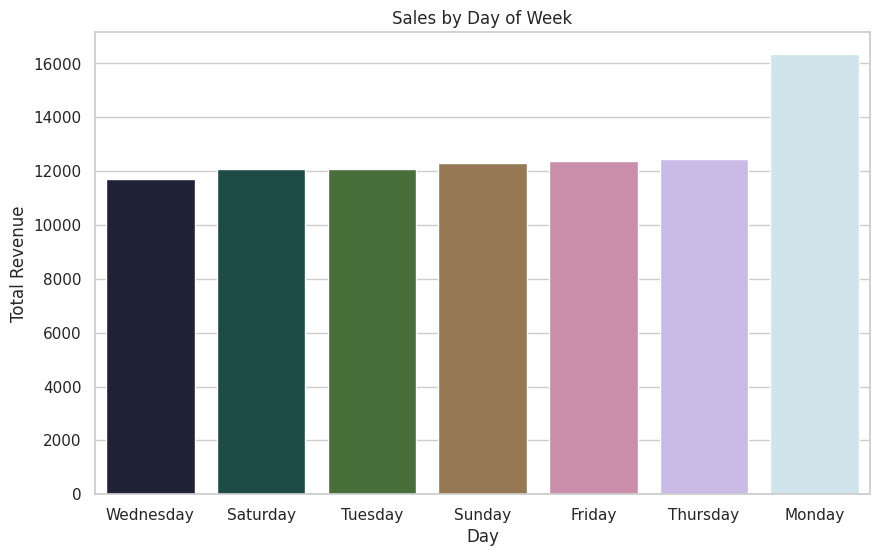

In [38]:
df["Day of Week"] = df["Transaction Date"].dt.day_name()
weekday_sales = df.groupby("Day of Week")["Total Spent"].sum().sort_values()

sns.barplot(
    x=weekday_sales.index,
    y=weekday_sales.values,
    hue=weekday_sales.index,
    palette="cubehelix",
    legend=False
)
plt.title("Sales by Day of Week")
plt.ylabel("Total Revenue")
plt.xlabel("Day")
plt.show()


